In [1]:
#Importamos packs y dataset
import numpy as np
import pandas as pd
df_properatti = pd.read_csv('properatti.csv')

In [2]:
#Desplegamos algunos valores del df
df_properatti.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [3]:
#Cantidad de filas y columnas del df
np.shape(df_properatti)

(121220, 26)

In [4]:
#Validamos aquellas columnas con un sólo valor en sus datos
print('Valores únicos: ')
print(df_properatti['operation'].unique())
print(df_properatti['country_name'].unique())
#Validamos aquellas columnas con valores acotados en sus datos
print('Valores acotados: ')
print(df_properatti['state_name'].unique())
print(df_properatti['currency'].unique())
print(df_properatti['property_type'].unique())

Valores únicos: 
['sell']
['Argentina']
Valores acotados: 
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Chaco' 'San Juan' 'Santa Cruz' 'Tierra Del Fuego'
 'Catamarca' 'Santiago Del Estero' 'Jujuy' 'La Rioja' 'Formosa']
['USD' nan 'ARS' 'PEN' 'UYU']
['PH' 'apartment' 'house' 'store']


In [5]:
#Droppeamos las columnas Unnamed: 0, operation, country_name, properati_url y image_thumbnail porque no suman valor al análisis.
df_properatti_1= df_properatti.drop(['Unnamed: 0', 'operation','country_name', 'properati_url', 'image_thumbnail'],axis=1)
df_properatti_1.head()

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


In [6]:
#Removemos duplicados
df_properatti_1 = df_properatti_1.drop_duplicates()
df_properatti_1.shape

(116140, 21)

In [7]:
#Tipos de datos
df_properatti_1.dtypes

property_type                  object
place_name                     object
place_with_parent_names        object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
description                    object
title                          object
dtype: object

### Aquí empiezo a pisar los mts2 comparando mts2 cub y mts2 totales.

In [8]:
print("Número total de filas con mts2 totales sin valor", df_properatti_1['surface_total_in_m2'].isnull().sum(), "observaciones") #Surface total con missing values
print("Número total de filas con mts2 cubiertos sin valor",df_properatti_1['surface_covered_in_m2'].isnull().sum(), "observaciones") #Surface Covered con missing values
print("Suma de conjuntos con ambos valores - (no deberiamos pisar estos datos)", (df_properatti_1['surface_total_in_m2'].notna () & df_properatti_1['surface_covered_in_m2'].notna()).sum(), "observaciones")
print("Sin superficie total, pero con mts cubiertos", (df_properatti_1['surface_total_in_m2'].isnull() & df_properatti_1['surface_covered_in_m2'].notna()).sum(), "observaciones")
print("Con superficie total, pero sin mts cubiertos", (df_properatti_1['surface_total_in_m2'].notna() & df_properatti_1['surface_covered_in_m2'].isnull()).sum(), "observaciones")
print("Ninguno de los dos datos - Imposible de rellenar, por ahora", (df_properatti_1['surface_total_in_m2'].isnull() & df_properatti_1['surface_covered_in_m2'].isnull()).sum(), "observaciones")
print ("")
print ("Lo que deberiamos hacer es sumar a los valores que tenemos tanto mts2 cub. Como mts2 totales aquellos que tienen uno de los dos datos.")

Número total de filas con mts2 totales sin valor 38378 observaciones
Número total de filas con mts2 cubiertos sin valor 18853 observaciones
Suma de conjuntos con ambos valores - (no deberiamos pisar estos datos) 70901 observaciones
Sin superficie total, pero con mts cubiertos 26386 observaciones
Con superficie total, pero sin mts cubiertos 6861 observaciones
Ninguno de los dos datos - Imposible de rellenar, por ahora 11992 observaciones

Lo que deberiamos hacer es sumar a los valores que tenemos tanto mts2 cub. Como mts2 totales aquellos que tienen uno de los dos datos.


In [9]:
#Pisamos los valores NaN de Surface covered con Surface Total
df_properatti_1.loc[df_properatti_1['surface_covered_in_m2'].isnull() & df_properatti_1['surface_total_in_m2'].notna(),['surface_covered_in_m2']] = df_properatti_1["surface_total_in_m2"]

In [10]:
#Pisamos los valores NaN de surface total con Surface covered

df_properatti_1.loc[df_properatti_1['surface_total_in_m2'].isnull() & df_properatti_1['surface_covered_in_m2'].notna(),['surface_total_in_m2']] = df_properatti_1["surface_covered_in_m2"]

In [11]:
print("RECHEQUEAMOS")
print()
print()

print("Número total de filas con mts2 totales sin valor", df_properatti_1['surface_total_in_m2'].isnull().sum(), "observaciones") #Surface total con missing values
print("Número total de filas con mts2 cubiertos sin valor",df_properatti_1['surface_covered_in_m2'].isnull().sum(), "observaciones") #Surface Covered con missing values
print("Suma de conjuntos con ambos valores - (no deberiamos pisar estos datos)", (df_properatti_1['surface_total_in_m2'].notna () & df_properatti_1['surface_covered_in_m2'].notna()).sum(), "observaciones")
print("Sin superficie total, pero con mts cubiertos", (df_properatti_1['surface_total_in_m2'].isnull() & df_properatti_1['surface_covered_in_m2'].notna()).sum(), "observaciones")
print("Con superficie total, pero sin mts cubiertos", (df_properatti_1['surface_total_in_m2'].notna() & df_properatti_1['surface_covered_in_m2'].isnull()).sum(), "observaciones")
print("Ninguno de los dos datos - Imposible de rellenar, por ahora", (df_properatti_1['surface_total_in_m2'].isnull() & df_properatti_1['surface_covered_in_m2'].isnull()).sum(), "observaciones")

RECHEQUEAMOS


Número total de filas con mts2 totales sin valor 11992 observaciones
Número total de filas con mts2 cubiertos sin valor 11992 observaciones
Suma de conjuntos con ambos valores - (no deberiamos pisar estos datos) 104148 observaciones
Sin superficie total, pero con mts cubiertos 0 observaciones
Con superficie total, pero sin mts cubiertos 0 observaciones
Ninguno de los dos datos - Imposible de rellenar, por ahora 11992 observaciones


### Tratamiento de series

In [12]:
#Validamos los valores en blancos
df_properatti_1.isnull().sum()

property_type                      0
place_name                        23
place_with_parent_names            0
state_name                         0
geonames_id                    18180
lat-lon                        48289
lat                            48289
lon                            48289
price                          17556
currency                       17557
price_aprox_local_currency     17556
price_aprox_usd                17556
surface_total_in_m2            11992
surface_covered_in_m2          11992
price_usd_per_m2               49289
price_per_m2                   30443
floor                         108481
rooms                          69941
expenses                      102055
description                        2
title                              0
dtype: int64

In [13]:
#Comenzamos a investigar sobre los valores NaN en 'place_name'
df_properatti_1[df_properatti_1['place_name'].isnull()]

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
6489,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,-58.638098,650000.0,USD,...,650000.0,240.0,240.0,2708.333333,2708.333333,NaN,NaN,NaN,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre
10201,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,-58.638067,535000.0,USD,...,535000.0,300.0,300.0,NaN,1783.333333,NaN,5.0,NaN,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...
11451,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,-58.626261,550000.0,USD,...,550000.0,2170.0,270.0,253.456221,2037.037037,NaN,NaN,NaN,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE
14839,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,-58.638174,480000.0,USD,...,480000.0,240.0,200.0,2000.000000,2400.000000,NaN,NaN,NaN,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre
18622,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,-58.626350,1297000.0,USD,...,1297000.0,340.0,340.0,3814.705882,3814.705882,NaN,NaN,NaN,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...
21922,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,-58.638405,440000.0,USD,...,440000.0,220.0,220.0,NaN,2000.000000,NaN,5.0,NaN,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre
23664,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,-58.641800,480000.0,USD,...,480000.0,294.0,294.0,1632.653061,1632.653061,NaN,NaN,NaN,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA
24722,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,-58.637778,530000.0,USD,...,530000.0,316.0,270.0,1677.215190,1962.962963,NaN,NaN,NaN,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre
38856,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,-58.579659,1350000.0,USD,...,1350000.0,550.0,550.0,NaN,2454.545455,NaN,NaN,NaN,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta"
45970,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,-58.637380,95000.0,USD,...,95000.0,55.0,27.0,1727.272727,3518.518519,NaN,1.0,NaN,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. Torre 2...",Excelente monoambiente. Barrio El Palmar. Con...


Los NaN en 'place_name', a priori, se podrían reemplazar por 'Tigre' aunque para no causar overfitting, buscamos la ubicación en otra columna.



In [14]:
#Utilizamos la función split para separar la columna place_with_parent_names
places_split = df_properatti_1['place_with_parent_names'].str.split('|',expand=True)


In [15]:
places_split.head()

,0,1,2,3,4,5,6
0,,Argentina,Capital Federal,Mataderos,,None,None
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None
2,,Argentina,Capital Federal,Mataderos,,None,None
3,,Argentina,Capital Federal,Liniers,,None,None
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None


In [16]:
#Renombramos las columnas del subdataframe
places_split.rename(columns={1:'Pais',
                         2:'Provincia',
                         3:'Partido',
                         4:'Localidad'},
                inplace=True)
#Droppeamos columnas 5 y 6 del subdataframe por el alcance que vamos a dar al análisis.
places_split.drop([5,6], axis=1)

,0,Pais,Provincia,Partido,Localidad
0,,Argentina,Capital Federal,Mataderos,
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,
2,,Argentina,Capital Federal,Mataderos,
3,,Argentina,Capital Federal,Liniers,
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro
5,,Argentina,Entre Ríos,Gualeguaychú,
6,,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,Munro
7,,Argentina,Capital Federal,Belgrano,
8,,Argentina,Capital Federal,Belgrano,
9,,Argentina,Santa Fe,Rosario,


In [17]:
#Reemplazamos los NaN de place_name por los partidos obtenidos en el subdata frame places_split
df_properatti_1.loc[df_properatti_1['place_name'].isnull(),'place_name']=places_split['Partido']

In [18]:
#Validamos que no quedan NaN en place_name
df_properatti_1['place_name'].isnull().sum()

0

In [19]:
#Tomamos un caso de los NaN detectados anteriormente para validar que se reemplazó por el valor correcto.
df_properatti_1.loc[6489,'place_name']

'Tigre'

In [20]:
df_amb = df_properatti_1["title"].str.extract("(\d)(\s?AMB+\.?)",expand=True)
print(df_amb.isnull().sum())
df_amb

0    108506
1    108506
dtype: int64


,0,1
0,2,AMB
1,NaN,NaN
2,2,AMB
3,NaN,NaN
4,2,AMB
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [21]:
#Pasamos toda la columna title y description a mayúscula
df_properatti_1['description'] = df_properatti_1['description'].str.upper()
df_properatti_1['title'] = df_properatti_1['title'].str.upper()

In [22]:
#Tratamos de hallar mediante expresiones regulares, los ambientes de los departamentos.
#Se busca en la columna 'title' y 'descripción'

df_amb = df_properatti_1["title"].str.extract("(\d)(\s?AMB+\.?)",expand=True)
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df_properatti_1["title"].str.extract("(\d)(\s?DORM+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df_properatti_1["title"].str.extract("(\d)(\s?HAB+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df_properatti_1["title"].str.extract("(\d)(\s?HABITAC+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df_properatti_1["title"].str.extract("(\d)(\s?MONO+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df_properatti_1["description"].str.extract("(\d)(\s?AMB+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df_properatti_1["description"].str.extract("(\d)(\s?DORM+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df_properatti_1["description"].str.extract("(\d)(\s?HAB+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df_properatti_1["description"].str.extract("(\d)(\s?HABITAC+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb = df_amb.fillna(df_properatti_1["description"].str.extract("(\d)(\s?MONO+\.?)",expand=True))
print(df_amb.isnull().sum())

df_amb[0]=df_amb[0].astype('float64')
print(df_properatti_1['rooms'].isnull().sum())

0    94719
1    94719
dtype: int64
0    87533
1    87533
dtype: int64
0    87449
1    87449
dtype: int64
0    87449
1    87449
dtype: int64
0    87410
1    87410
dtype: int64
0    65554
1    65554
dtype: int64
0    42386
1    42386
dtype: int64
0    40833
1    40833
dtype: int64
0    40833
1    40833
dtype: int64
0    40536
1    40536
dtype: int64
69941


In [23]:
#Renombramos primera columna del subdataframe
df_amb.rename(columns={0:'Hab',1:'Text'}, inplace=True)


In [24]:
df_amb

,Hab,Text
0,2.0,AMB
1,2.0,DORM.
2,2.0,AMB
3,3.0,AMB.
4,2.0,AMB
5,NaN,NaN
6,NaN,NaN
7,0.0,MONO
8,NaN,NaN
9,2.0,DORM


In [25]:
#Value counts sobre las primeras columnas para verificar que números de ambientes/dormitorios tomados.
print(df_amb['Hab'].value_counts())
print(df_amb['Hab'].value_counts().sum())

2.0    25916
3.0    24297
4.0    11170
1.0     9614
5.0     3092
6.0      848
7.0      361
0.0      147
8.0      104
9.0       55
Name: Hab, dtype: int64
75604


In [26]:
#Value counts sobre la segunda columna para verificar que sólo tomamos valores relacionados a ambientes/dormitorios.
print(df_amb['Text'].value_counts())
print(df_amb['Text'].value_counts().sum())

 AMB      39213
 DORM     28545
 AMB.      3240
 HAB       1607
 DORM.     1607
AMB         711
 MONO       200
DORM        184
MONO        136
AMB.        108
DORM.        16
 HAB.        15
HAB          15
 AMB          5
 DORM         2
Name: Text, dtype: int64
75604


In [27]:
#Sobre aquellas descripciones de monoambiente, imputamos valor 1 en 'Hab'
df_amb.loc[(df_amb['Text'] == ' MONO'),'Hab'] = 1
df_amb.loc[(df_amb['Text'] == 'MONO'),'Hab'] = 1

In [28]:
df_amb

,Hab,Text
0,2.0,AMB
1,2.0,DORM.
2,2.0,AMB
3,3.0,AMB.
4,2.0,AMB
5,NaN,NaN
6,NaN,NaN
7,1.0,MONO
8,NaN,NaN
9,2.0,DORM


In [29]:
#Reemplazamos los NaN de rooms por los valores obtenidos en el subdata frame df_amb
df_properatti_1.loc[df_properatti_1['rooms'].isnull(),'rooms']=df_amb['Hab']

In [30]:
#Reemplazamos los 0 de rooms por NaN para no sesgar los estadísticos/parámetros posteriormente
df_properatti_1.loc[(df_properatti_1['rooms'] == 0),'rooms'] = 'NaN'

In [31]:
#Value count y total de valores 
print(df_properatti_1['rooms'][(df_properatti_1['rooms'] != 0)].value_counts())
print(df_properatti_1['rooms'][(df_properatti_1['rooms'] != 0)].value_counts().sum())

2.0     25985
3.0     25492
4.0     13978
1.0     12079
5.0      5422
6.0      1877
7.0       947
8.0       458
10.0      224
9.0       211
11.0       72
NaN        70
12.0       65
13.0       33
14.0       27
15.0       25
17.0       16
20.0       11
16.0       11
22.0        8
18.0        6
21.0        5
19.0        4
25.0        4
30.0        4
32.0        3
23.0        2
24.0        1
27.0        1
28.0        1
29.0        1
31.0        1
Name: rooms, dtype: int64
87044


In [32]:
#Chequeamos los nulls de la serie rooms
df_properatti_1.loc[df_properatti_1['rooms'].isnull()==True,]

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
5,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,-58.519828,NaN,NaN,...,NaN,53.0,53.0,NaN,NaN,NaN,NaN,NaN,"CASA EN EL PERÍMETRO DEL BARRIO 338, UBICADA E...","CASA BARRIO 338. SOBRE CALLE 3 DE CABALLERÍA, ..."
6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,USD,...,130000.00,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,..."
8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,...,195000.00,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,..."
18,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.425087,-58.5796585",-34.425087,-58.579659,570000.0,USD,...,570000.00,270.0,270.0,2111.111111,2111.111111,NaN,NaN,NaN,CASA SOBRE LOTE AL GOLF EN BARRIO SAN ISIDRO L...,"CASA EN VENTA EN BARRIO SAN ISIDRO LABRADOR, T..."
20,house,Villa Giardino,|Argentina|Córdoba|Villa Giardino|,Córdoba,3832729.0,"-31.0529852,-64.4991278",-31.052985,-64.499128,NaN,NaN,...,NaN,148.0,148.0,NaN,NaN,NaN,NaN,NaN,"CONSTA DE: COMEDOR-COCINA, CUATRO DORMITORIOS ...","CASA CON EXCELENTE UBICACIÒN, CALLE ASFALTADA,..."
26,house,Barrio San Gabriel,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barr...,Bs.As. G.B.A. Zona Norte,NaN,"-34.3640924,-58.6897345",-34.364092,-58.689735,265000.0,USD,...,265000.00,230.0,190.0,1152.173913,1394.736842,NaN,NaN,NaN,CASA EN VENTA EN COMPLEJO VILLANUEVA BARRIO SA...,CASA MUY LINDA EN SAN GABRIEL VILLANUEVA
27,house,Estancias del Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Esta...,Bs.As. G.B.A. Zona Norte,NaN,"-34.4794863,-58.9845412",-34.479486,-58.984541,650000.0,USD,...,650000.00,425.0,425.0,1529.411765,1529.411765,NaN,NaN,NaN,ESTANCIAS PROPONE VIVIR RODEADOS DE NATURALEZA...,EXCELENTE PROPIEDAD!!!! EN ESTANCIAS DEL PILAR
37,house,Malagueño,|Argentina|Córdoba|Malagueño|,Córdoba,3845202.0,"-31.4373176491,-64.4580057347",-31.437318,-64.458006,1250000.0,ARS,...,70104.59,75.0,75.0,934.727867,16666.666667,NaN,NaN,NaN,NUEVOS INGRESO:-VENTA-VILLA SAN NICOLAS.PRESEN...,CASA VENTA VILLA SAN NICOLAS
42,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Bs.As. G.B.A. Zona Norte,3429979.0,NaN,NaN,NaN,74000.0,USD,...,74000.00,47.0,47.0,1574.468085,1574.468085,NaN,NaN,NaN,"UBICADO EN PLANTA BAJA, POSEE PATIO Y UN AREA ...","DUPLEX EN VILLA MORRA , MUY BUENA UBICACION ,..."
47,house,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Capital Federal,3429760.0,"-34.6177194,-58.3620561",-34.617719,-58.362056,70000.0,USD,...,70000.00,80.0,50.0,875.000000,1400.000000,NaN,NaN,NaN,ESTRUCTURA ECOLOGICA FLOTANTEIDEAL PARA UBICAR...,FLOAT LIFE - CASA FLOTANTE - UBICABLE EN CLUBS...


In [33]:
#Tratamos de hallar mediante expresiones regulares, los m2 de los departamentos.
#Se busca en la columna 'title' y 'descripción'

df_mts = df_properatti_1["title"].str.extract("(\d+)(\s?M2+\.?)",expand=True)
print(df_mts.isnull().sum())

df_mts = df_mts.fillna(df_properatti_1["title"].str.extract("(\d+)(\s?MTS\.?)",expand=True))
print(df_mts.isnull().sum())

df_mts = df_mts.fillna(df_properatti_1["title"].str.extract("(\d+)(\s?METROS\.?)",expand=True))
print(df_mts.isnull().sum())

df_mts = df_mts.fillna(df_properatti_1["description"].str.extract("(\d+)(\s?M2\.?)",expand=True))
print(df_mts.isnull().sum())

df_mts = df_mts.fillna(df_properatti_1["description"].str.extract("(\d+)(\s?METROS\.?)",expand=True))
print(df_mts.isnull().sum())

df_mts = df_mts.fillna(df_properatti_1["title"].str.extract("(\d+)(\s?MTS\.?)",expand=True))
print(df_mts.isnull().sum())

df_mts[0]=df_mts[0].astype('float64')
print("NAN en la columna de superficie total: ", df_properatti_1['surface_total_in_m2'].isnull().sum())

0    113743
1    113743
dtype: int64
0    113177
1    113177
dtype: int64
0    113046
1    113046
dtype: int64
0    88631
1    88631
dtype: int64
0    84067
1    84067
dtype: int64
0    84067
1    84067
dtype: int64
NAN en la columna de superficie total:  11992


In [34]:
#Renombramos a la columna que indica los mts cuadrados
df_mts.rename(columns={0:'M2'}, inplace=True)
df_mts

,M2,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,106.0,M2
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [35]:
#Value counts sobre las primeras columnas para verificar que cantidad de metros cuadrados tomamos.
print(df_mts['M2'].value_counts())
print(df_mts['M2'].value_counts().sum())

50.0        1075
100.0        838
40.0         695
200.0        678
300.0        629
0.0          607
30.0         593
60.0         535
70.0         509
80.0         467
45.0         400
150.0        399
5.0          395
500.0        368
800.0        354
35.0         349
90.0         326
120.0        323
20.0         315
38.0         313
25.0         309
36.0         287
400.0        274
42.0         272
48.0         264
600.0        257
55.0         253
250.0        250
65.0         244
700.0        242
            ... 
963.0          1
1710.0         1
2260.0         1
120030.0       1
2204.0         1
833.0          1
1856.0         1
1075.0         1
4900.0         1
1361.0         1
623.0          1
741.0          1
3820.0         1
2470.0         1
939.0          1
749.0          1
1540.0         1
453.0          1
899.0          1
7516.0         1
1221.0         1
3980.0         1
2950.0         1
4450.0         1
573.0          1
2035.0         1
2949.0         1
2741.0        

In [36]:
#Reemplazamos los NaN de metros cuadrados totales por los m2 obtenidos en el subdata frame df_mts
df_properatti_1.loc[df_properatti_1['surface_total_in_m2'].isnull(),'surface_total_in_m2']=df_mts['M2']

In [37]:
#Reemplazamos los 0 de m2 por NaN para no sesgar los estadísticos/parámetros posteriormente
df_properatti_1.loc[(df_properatti_1['surface_total_in_m2'] == 0),'surface_total_in_m2'] = 'NaN'

In [38]:
#Value count y total de valores 
print(df_properatti_1['surface_total_in_m2'][(df_properatti_1['surface_total_in_m2'] != 0)].value_counts())
print(df_properatti_1['surface_total_in_m2'][(df_properatti_1['surface_total_in_m2'] != 0)].value_counts().sum())

40.0       2327
50.0       2275
60.0       1898
45.0       1895
70.0       1577
100.0      1505
200.0      1488
80.0       1463
42.0       1395
55.0       1377
35.0       1347
300.0      1346
20.0       1334
30.0       1323
120.0      1183
65.0       1175
38.0       1165
43.0       1121
90.0       1100
48.0       1051
36.0       1049
52.0       1048
150.0      1031
75.0       1013
53.0        965
37.0        965
47.0        958
110.0       899
51.0        877
44.0        853
           ... 
1626.0        1
1627.0        1
1630.0        1
1634.0        1
1638.0        1
1640.0        1
1655.0        1
1658.0        1
1660.0        1
1661.0        1
1592.0        1
1577.0        1
1511.0        1
1574.0        1
1514.0        1
1520.0        1
1522.0        1
1525.0        1
1527.0        1
1528.0        1
1530.0        1
1535.0        1
1537.0        1
1539.0        1
1555.0        1
1561.0        1
1565.0        1
1567.0        1
1568.0        1
16028.0       1
Name: surface_total_in_m

In [39]:
df_properatti_1['surface_total_in_m2'].isnull()

0         False
1          True
2         False
3          True
4         False
5         False
6         False
7         False
8         False
9          True
10        False
11         True
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
121182    False
121183    False
121184    False
121185    False
121186    False
121187    False
121189    False
121190    False
121191    False
121193    False
121194    False
121196    False
121197    False
121198    False
121199    False
121200    False
121202    False
121203    False
121205    False
121207    False
121210    False
121211    False
121212    False
121213    False
121214    False
121215    False
121216    False
121217    False
121218    False
121219    False
Name: surface_total_in_m

In [40]:
#chequeo la columna de mts cuadrados con NaN
df_properatti_1.loc[df_properatti_1['surface_total_in_m2'].isnull()]

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,150000.00,NaN,NaN,NaN,NaN,NaN,2,NaN,VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...,VENTA DEPTO 2 DORM. A ESTRENAR 7 E/ 36 Y 37 ...
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,95000.00,NaN,NaN,NaN,NaN,NaN,3,NaN,PH 3 AMBIENTES CON PATIO. HAY 3 DEPTOS EN LOTE...,PH 3 AMB. CFTE. RECICLADO
9,house,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,-60.725919,460000.0,ARS,...,25798.49,NaN,NaN,NaN,NaN,NaN,2,NaN,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO
11,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Bs.As. G.B.A. Zona Norte,NaN,"-34.5390571,-58.7196093",-34.539057,-58.719609,150000.0,USD,...,150000.00,NaN,NaN,NaN,NaN,NaN,1,NaN,"ENTRADA DE COCHE, JARDIN, LIVING EN DESNIVEL, ...",CHALET
70,PH,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3430863.0,"-37.9765072,-57.5695686",-37.976507,-57.569569,85000.0,USD,...,85000.00,NaN,NaN,NaN,NaN,NaN,2,NaN,COMPLETO DE DTOS. EN PH. TRES DTOS DE 2 AMB. E...,COMPLEJO DE DTOS. EN PH. - TRES DTOS DE 2 AMB....
71,PH,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3430863.0,"-37.9765072,-57.5695686",-37.976507,-57.569569,115000.0,USD,...,115000.00,NaN,NaN,NaN,NaN,NaN,3,NaN,COMPLEJO DE DTOS. EN PH. DOS DTOS DE 3 AMB. EN...,COMPLEJO DTOS. EN PH - DOS DTOS DE 3 AMB. CON ...
72,PH,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3430863.0,"-37.9765072,-57.5695686",-37.976507,-57.569569,62000.0,USD,...,62000.00,NaN,NaN,NaN,NaN,NaN,1,NaN,COMPLETO DE DTOS. EN PH. DOS DTOS DE 1 AMB. LA...,COMPLEJO DE DTOS. EN PH - DOS DTOS. DE 1 AMB....
88,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,"-31.3987492,-64.1918878",-31.398749,-64.191888,990000.0,USD,...,990000.00,NaN,NaN,NaN,NaN,NaN,1,NaN,DEPARTAMENTO EN VENTA DE 1 DORM. EN CORDOBA,COFICO 1D CON TERRAZA PPIA CON ASADOR
90,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,"-31.4088498,-64.1979565",-31.408850,-64.197956,1250000.0,USD,...,1250000.00,NaN,NaN,NaN,NaN,NaN,3,NaN,DEPARTAMENTO EN VENTA DE 1 DORM. EN CORDOBA,EXCELENTE | MENDOZA 237 | MTS PLAZA COLO
91,house,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,"-31.3356946,-64.2796676",-31.335695,-64.279668,260000.0,USD,...,260000.00,NaN,NaN,NaN,NaN,NaN,3,NaN,CASA EN VENTA EN CORDOBA,ZONA NORTE ESPEC. CASA EN VILLA QUISQUIS


In [41]:
# Reemplazamos todos los NaN de la columna "Price" y "Currency" por los valores encontrados en title y descripcion

In [42]:
df_properatti_1["price"].isnull().sum() #veo cuando nulls tenemos (nota: aquí tiene en cuenta strings)


17556

In [43]:
df_properatti_1["description"].astype(str)

0         2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...
1         VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...
2         2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
3         PH 3 AMBIENTES CON PATIO. HAY 3 DEPTOS EN LOTE...
4         DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...
5         CASA EN EL PERÍMETRO DEL BARRIO 338, UBICADA E...
6         MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...
7         EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
8         EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER...
9         MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...
10        HERMOSA CASA SIN TERMINAR DE 3 DORMITORIOS, BA...
11        ENTRADA DE COCHE, JARDIN, LIVING EN DESNIVEL, ...
12        EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...
13         TORRE I MONDRIAN. 3 AMBIENTES CON TERRAZA Y D...
14        TORRE II DALÍ. AMBIENTE UNICO DIVISIBLE.VITRAU...
15        ULTIMA UNIDAD DISPONIBLEHAUS BOULEVARD: METROS...
16        VENTAS MATADEROS AL FRENTE DUP

In [44]:
#ELIMINAMOS TODO TIPO DE STRING DENTRO DE LA COLUMNA Price
df_properatti_1["price"].astype(str).str.replace("USD","")
df_properatti_1["price"].astype(str).str.replace("US","")
df_properatti_1["price"].astype(str).str.replace("ARS","")
df_properatti_1["price"].astype(str).str.replace("USS","")
df_properatti_1["price"].astype(str).str.replace("AR","")

0           62000.0
1          150000.0
2           72000.0
3           95000.0
4           64000.0
5               nan
6          130000.0
7          138000.0
8          195000.0
9          460000.0
10          70000.0
11         150000.0
12         115000.0
13         111700.0
14         147900.0
15         250000.0
16         239000.0
17         315000.0
18         570000.0
19         350000.0
20              nan
21         270500.0
22         290000.0
23          82000.0
24         355000.0
25         358550.0
26         265000.0
27         650000.0
28         362150.0
29          75000.0
            ...    
121182    1411000.0
121183    1470000.0
121184    1454000.0
121185    1454000.0
121186    1465000.0
121187    1471000.0
121189    2678000.0
121190    2714000.0
121191    1482000.0
121193    1859000.0
121194    1487000.0
121196    1497000.0
121197    1497000.0
121198    1492000.0
121199    1502000.0
121200    1498000.0
121202    1507000.0
121203    1502000.0
121205    1507000.0


In [45]:
prueba_1 = df_properatti_1["description"] #Vamos a trabajar solo en la serie descripcion

In [46]:
prueba_1 = prueba_1.str.replace('$', 'S') #cambiamos el signo $ por S

In [47]:
prueba_1 = prueba_1.str.replace('.', '') #eliminamos los puntos por espacios vací

In [48]:
prueba_1 = prueba_1.str.upper() #todo a mayuscula

In [49]:
prueba_2 = prueba_1.str.extract('((USD|USS|ARS|US)\s\d*)', expand=True)  #split solo quedandome con estos patrones

In [50]:
prueba_2 #reviso como quedo

,0,1
0,NaN,NaN
1,USD 20000,USD
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [51]:
prueba_2[0] = prueba_2[0].str.extract('(\d+)') #elimino caracteres de moneda

In [52]:
prueba_2.rename(columns={0:'P.Corregido'},inplace=True) # con esto pisaremos algunos nulls de precio

In [53]:
prueba_2.rename(columns={1:'Moneda'},inplace=True) #pisaremos en caso de no tener la moneda

In [54]:
df_properatti_1.loc[df_properatti_1['price'].isnull(),'price']=prueba_2["P.Corregido"]                           

In [55]:
df_properatti_1.loc[df_properatti['currency'].isnull(),'currency']=prueba_2["Moneda"]            

In [56]:
df_properatti_1["price"].isnull().sum() #vemos nuevamente cuantos nulls hay

16365

In [57]:
prueba_3 = df_properatti_1["title"] #Ahora empezamos a ver si podemos recolectar precios de la columna titulo. Hacemos mismo proceso

In [58]:
prueba_3 = prueba_3.str.replace('$', 'S') #cambiamos el signo $ por S

In [59]:
prueba_3 = prueba_3.str.replace('.', '') #eliminamos los puntos por espacios vacíos.

In [60]:
prueba_3 = prueba_3.str.upper() #todo a mayuscula

In [61]:
prueba_4 = prueba_3.str.extract('((USD|USS|ARS|US)\s\d*)', expand=True) #split solo quedandome con estos patrones

In [62]:
prueba_4.sample(35) #vemos como quedo

,0,1
49828,NaN,NaN
31905,NaN,NaN
76328,NaN,NaN
57680,NaN,NaN
91308,NaN,NaN
17593,NaN,NaN
10977,NaN,NaN
64875,NaN,NaN
13449,NaN,NaN
103596,NaN,NaN


In [63]:
prueba_4[0] = prueba_4[0].str.extract('(\d+)') #elimino caracteres de moneda

In [64]:
prueba_4.rename(columns={0:'P.Corregido'},inplace=True)

In [65]:
prueba_4.rename(columns={1:'Moneda'},inplace=True)

In [66]:
df_properatti_1.loc[df_properatti_1['price'].isnull(),'price']=prueba_4["P.Corregido"]                           

In [67]:
df_properatti_1.loc[df_properatti_1['currency'].isnull(),'currency']=prueba_4["Moneda"]      

In [68]:
df_properatti_1["price"].isnull().sum() 

14450

In [69]:
## Empezamos a reconvertir valores a USD

In [70]:
#Creamos nueva columna para precio dolar
df_properatti_1['P.DOLAR'] = "NaN"

In [71]:
#Reemplazamos USS y US (obtenidos en Desc y Title) por USD así unificamos.
df_properatti_1['currency'] = df_properatti_1['currency'].replace('USS', 'USD') 
df_properatti_1['currency'] = df_properatti_1['currency'].replace('US', 'USD') 

In [72]:
df_properatti_1["currency"].unique()

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [73]:
US_US = 1
ARS_US = 45.90
UYU = 34.98
PEN = 3.31

In [74]:
df_properatti_1['P.DOLAR'] = np.where(df_properatti_1["currency"] == "USD",df_properatti_1["price"].astype(float)*US_US,
                                    (np.where(df_properatti_1["currency"] == "ARS",df_properatti_1["price"].astype(float)/ARS_US,
                                              np.where(df_properatti_1["currency"] == "UYU",df_properatti_1["price"].astype(float)/UYU,
                                                       np.where(df_properatti_1["currency"] == "PEN",df_properatti_1["price"].astype(float)/PEN,"")))))

In [75]:
df_properatti_1['P.DOLAR']


0                    62000.0
1                   150000.0
2                    72000.0
3                    95000.0
4                    64000.0
5                           
6                   130000.0
7                   138000.0
8                   195000.0
9         10021.786492374727
10                   70000.0
11                  150000.0
12                  115000.0
13                  111700.0
14                  147900.0
15                  250000.0
16                  239000.0
17                  315000.0
18                  570000.0
19                  350000.0
20                          
21                  270500.0
22                  290000.0
23                   82000.0
24                  355000.0
25                  358550.0
26                  265000.0
27                  650000.0
28                  362150.0
29                   75000.0
                 ...        
121182     30740.74074074074
121183    32026.143790849674
121184     31677.55991285403
121185     316

In [76]:
prueba = df_properatti_1.iloc[:, 11:15]
prueba['P.DOLAR']=df_properatti_1['P.DOLAR']
prueba

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,P.DOLAR
0,62000.00,55,40.0,1127.272727,62000.0
1,150000.00,NaN,NaN,NaN,150000.0
2,72000.00,55,55.0,1309.090909,72000.0
3,95000.00,NaN,NaN,NaN,95000.0
4,64000.00,35,35.0,1828.571429,64000.0
5,NaN,53,53.0,NaN,
6,130000.00,106,78.0,1226.415094,130000.0
7,138000.00,45,40.0,3066.666667,138000.0
8,195000.00,65,60.0,3000.000000,195000.0
9,25798.49,NaN,NaN,NaN,10021.786492374727


### Cruzo precio c/ mts2 cubiertos y totales.

In [77]:
df_properatti_1.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title', 'P.DOLAR'],
      dtype='object')

In [78]:
df_properatti_1.isnull().sum()

property_type                      0
place_name                         0
place_with_parent_names            0
state_name                         0
geonames_id                    18180
lat-lon                        48289
lat                            48289
lon                            48289
price                          14450
currency                       13123
price_aprox_local_currency     17556
price_aprox_usd                17556
surface_total_in_m2             9513
surface_covered_in_m2          11992
price_usd_per_m2               49289
price_per_m2                   30443
floor                         108481
rooms                          29096
expenses                      102055
description                        2
title                              0
P.DOLAR                            0
dtype: int64

In [79]:
#creo una nueva columna en la que pongo la multiplicación de la superficie por el precio por metro cuadrado, lo que me deja la columna nueva (provisional) con precios
prueba["precio nuevo"]= prueba.iloc[:, 1]*prueba.iloc[:,3]

prueba

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,P.DOLAR,precio nuevo
0,62000.00,55,40.0,1127.272727,62000.0,62000
1,150000.00,NaN,NaN,NaN,150000.0,NaN
2,72000.00,55,55.0,1309.090909,72000.0,72000
3,95000.00,NaN,NaN,NaN,95000.0,NaN
4,64000.00,35,35.0,1828.571429,64000.0,64000
5,NaN,53,53.0,NaN,,NaN
6,130000.00,106,78.0,1226.415094,130000.0,130000
7,138000.00,45,40.0,3066.666667,138000.0,138000
8,195000.00,65,60.0,3000.000000,195000.0,195000
9,25798.49,NaN,NaN,NaN,10021.786492374727,NaN


In [80]:
#paso a float todos los datos de la columna P.DOLAR para poder hacer el traspaso de datos
prueba["P.DOLAR"] = pd.to_numeric(prueba["P.DOLAR"], errors='coerce')

In [81]:
#relleno los datos de la columna provisional en la columna de P.DOLAR solo en los casos en los que tenía nulls. 
prueba["P.DOLAR"] = prueba["P.DOLAR"].fillna(prueba["precio nuevo"])

In [82]:
prueba["surface_total_in_m2"] = pd.to_numeric(prueba["surface_total_in_m2"], errors='coerce')


In [83]:
#Ahora hacemos lo mismo de recién pero para rellenar datos faltants en la columna de price_usd_per_m2
prueba["p_por_m2_provisional"]= prueba.iloc[:, 4] / prueba.iloc[:, 1]

In [84]:
prueba["price_usd_per_m2"] = prueba["price_usd_per_m2"].fillna(prueba["p_por_m2_provisional"])

In [85]:
#reemplazo las columnas que cambié en el df prueba y las pongo en el original de df_properatti_1
columnas = "price_aprox_usd surface_total_in_m2 surface_covered_in_m2 price_usd_per_m2 P.DOLAR".split()
df_properatti_1[columnas]=prueba[columnas]

In [86]:
df_properatti_1.isnull().sum()

property_type                      0
place_name                         0
place_with_parent_names            0
state_name                         0
geonames_id                    18180
lat-lon                        48289
lat                            48289
lon                            48289
price                          14450
currency                       13123
price_aprox_local_currency     17556
price_aprox_usd                17556
surface_total_in_m2             9935
surface_covered_in_m2          11992
price_usd_per_m2               21394
price_per_m2                   30443
floor                         108481
rooms                          29096
expenses                      102055
description                        2
title                              0
P.DOLAR                        14451
dtype: int64

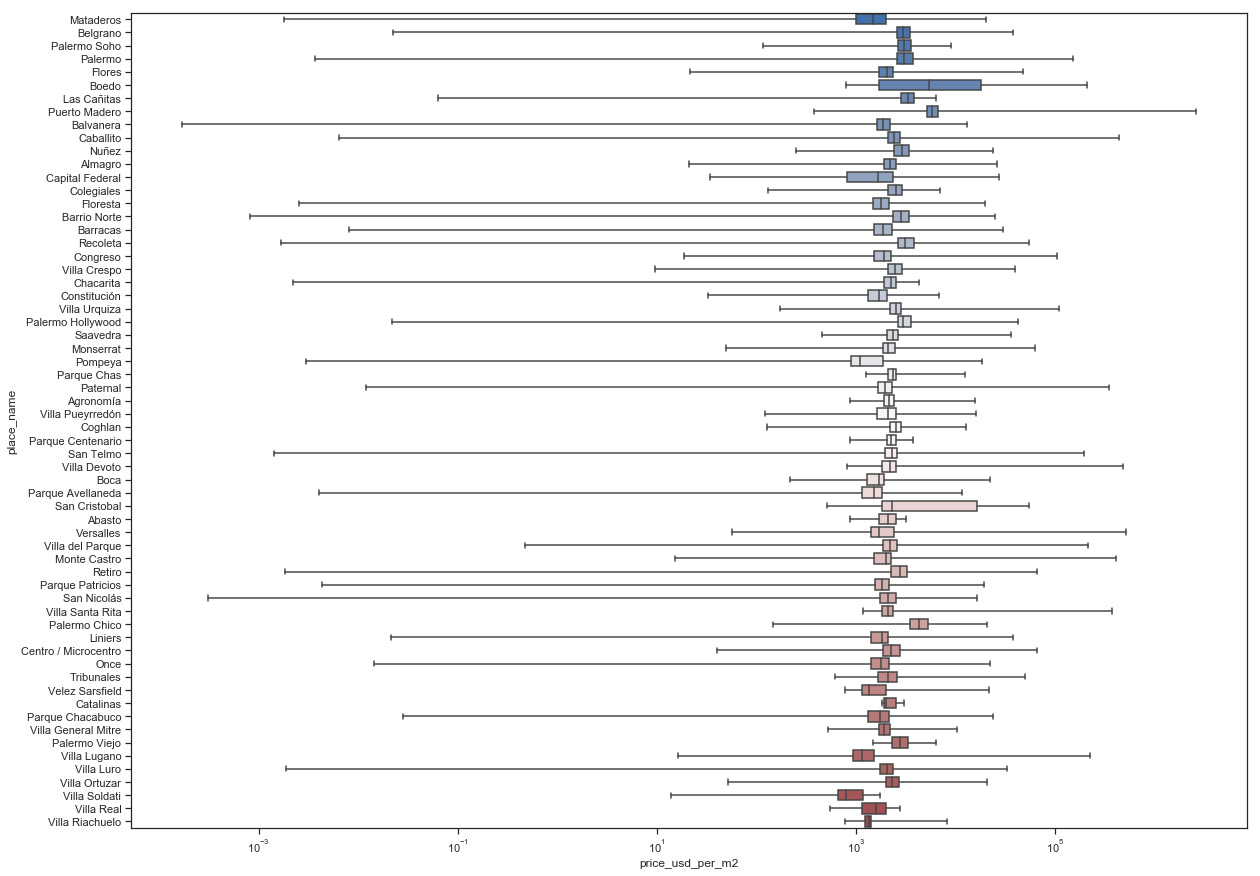

In [93]:
# No uso inplace=True para que a lo sumo si se borran los renglones no se modifica el df_properatti_1
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

df1 = df_properatti_1.dropna(subset=['price_usd_per_m2'])

f, ax = plt.subplots(figsize=(20, 15))
ax.set_xscale("log")

sns.boxplot(x="price_usd_per_m2", y="place_name", data=df1[df1['state_name']=='Capital Federal'], whis="range", palette="vlag")

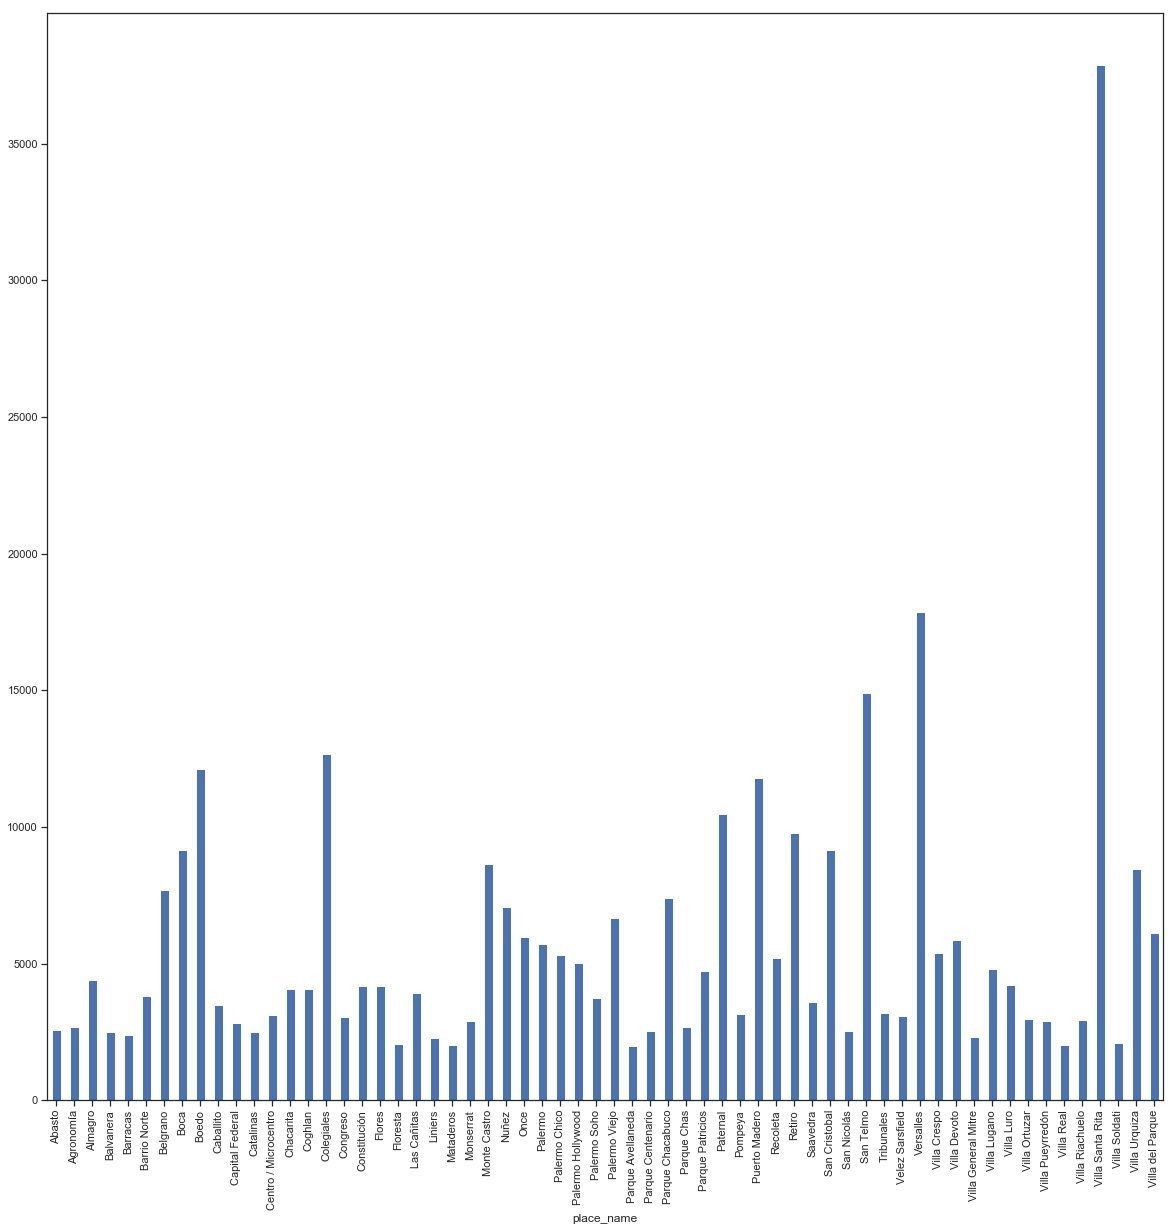

In [88]:
plt.figure(figsize=(20,20))
df_properatti_1[df_properatti_1['state_name']=='Capital Federal'].groupby("place_name").mean()["price_per_m2"].plot.bar()


(1, 4)

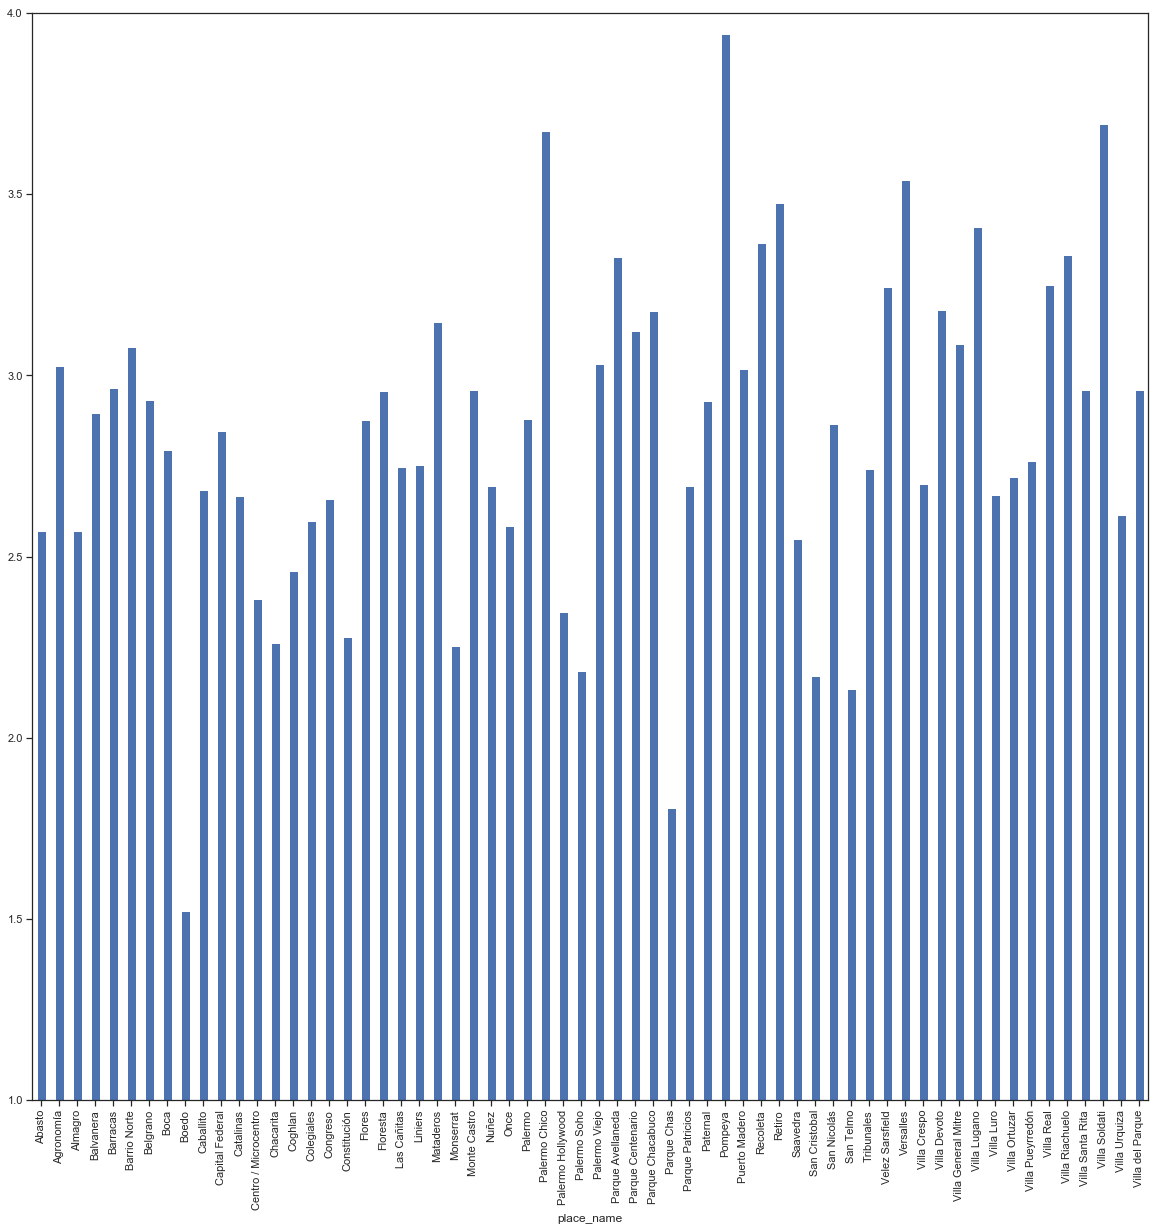

In [89]:
#ambientes promedio en caba por barrio
plt.figure(figsize=(20,20))
df_properatti_1["rooms"] = df_properatti_1["rooms"].astype(float)
df_properatti_1[df_properatti_1['state_name']=='Capital Federal'].groupby("place_name").mean()["rooms"].plot.bar()
plt.ylim((1,4))

In [90]:
df_properatti_1.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title', 'P.DOLAR'],
      dtype='object')

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

# Convierto y dropeo para evitar errores
df = df_properatti_1
df['surface_total_in_m2'] = pd.to_numeric(df['surface_total_in_m2'], errors='coerce')
df = df.dropna(subset=['price_usd_per_m2'])

# Defino una función para obtener intervalos significativos
def int_sig(sig, sample):
    mean, sigma, n = np.mean(sample), np.std(sample), len(sample)
    return st.norm.interval(sig, loc=mean, scale = sigma/np.sqrt(n) )
# Con un groupby puedo obtener los intervalos significativos de cada lugar
intervalo = df.groupby('place_name').apply(lambda df: int_sig(0.95, df['price_usd_per_m2']))

# HAY UN PROBLEMA DE DIMENSIONALIDAD
aux1 = pd.DataFrame(intervalo)
aux1

,0
place_name,
Country Maschwitz Club,"(775.5313545687701, 1592.7842718145853)"
los alamos,"(nan, nan)"
9 de Abril,"(12.929378650119702, 670.9608052400641)"
Abasto,"(1912.7516817778296, 2137.1289431947434)"
Abril Club de Campo,"(610.9408175975453, 1794.4222938443017)"
Acacias Blancas,"(1087.7076768947804, 1307.4768407982542)"
Acassuso,"(2025.696452005784, 2487.3581469969045)"
Achiras,"(-624276.7881268701, 2428574.407174489)"
Adrogué,"(1845.4408510970673, 2244.751235726082)"


In [96]:
# ESTOY TRABADO EN USAR UN CONDICIONAL PARA ELIMINAR LOS VALORES QUE ESCAPEN DEL INTERVALO. NO PUEDO CON MERGE POR EL INDICE QUE NO CUENTA COMO COLUMNA. Obtengo estadisticos
df.groupby('place_name')['price_usd_per_m2'].describe()

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Country Maschwitz Club,3.0,1184.157813,4.422671e+02,812.500000,939.583333,1066.666667,1369.986720,1.673307e+03
los alamos,1.0,1600.000000,NaN,1600.000000,1600.000000,1600.000000,1600.000000,1.600000e+03
9 de Abril,3.0,341.945092,3.561023e+02,94.017094,137.917638,181.818182,465.909091,7.500000e+02
Abasto,102.0,2024.940312,5.809520e+02,781.250000,1561.128016,2000.000000,2500.000000,3.196721e+03
Abril Club de Campo,8.0,1202.681556,9.129024e+02,1.633824,459.775641,1418.181818,1600.000000,2.534562e+03
Acacias Blancas,34.0,1197.592259,3.318262e+02,467.741935,1016.250000,1254.139073,1380.797101,1.888889e+03
Acassuso,227.0,2256.527300,1.778351e+03,692.307692,1425.363559,2088.888889,2684.951456,2.425000e+04
Achiras,4.0,902148.809524,1.798568e+06,1428.571429,1857.142857,3583.333333,903875.000000,3.600000e+06
Adrogué,623.0,2045.096043,2.544634e+03,100.950533,1301.481481,1718.750000,2197.560976,3.782609e+04


In [97]:
# Estadisticos de superficie
df.groupby('place_name')['surface_total_in_m2'].describe()

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Country Maschwitz Club,3.0,263.666667,31.942657,240.0,245.50,251.0,275.50,300.0
los alamos,1.0,51.000000,NaN,51.0,51.00,51.0,51.00,51.0
9 de Abril,3.0,1256.666667,903.124207,400.0,785.00,1170.0,1685.00,2200.0
Abasto,102.0,92.539216,96.662695,22.0,43.00,60.5,106.25,620.0
Abril Club de Campo,8.0,501.875000,153.915039,275.0,400.50,550.0,581.50,680.0
Acacias Blancas,34.0,234.411765,135.631211,90.0,160.00,190.5,270.00,620.0
Acassuso,227.0,395.581498,613.396872,20.0,100.00,225.0,449.50,7500.0
Achiras,4.0,70.750000,91.328619,1.0,9.25,41.0,102.50,200.0
Adrogué,623.0,179.728732,139.005593,10.0,88.50,139.0,227.00,1294.0


In [98]:
# Estadisticas de habitaciones
df.groupby('place_name')['rooms'].describe()

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Country Maschwitz Club,2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0
los alamos,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
9 de Abril,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
Abasto,89.0,2.539326,1.314743,1.0,2.00,2.0,3.00,7.0
Abril Club de Campo,5.0,3.400000,2.302173,1.0,2.00,3.0,4.00,7.0
Acacias Blancas,24.0,3.583333,1.639636,2.0,3.00,3.0,4.00,8.0
Acassuso,136.0,3.301471,1.097606,1.0,3.00,3.0,4.00,7.0
Achiras,4.0,1.500000,1.000000,1.0,1.00,1.0,1.50,3.0
Adrogué,328.0,2.939024,1.137061,1.0,2.00,3.0,4.00,9.0


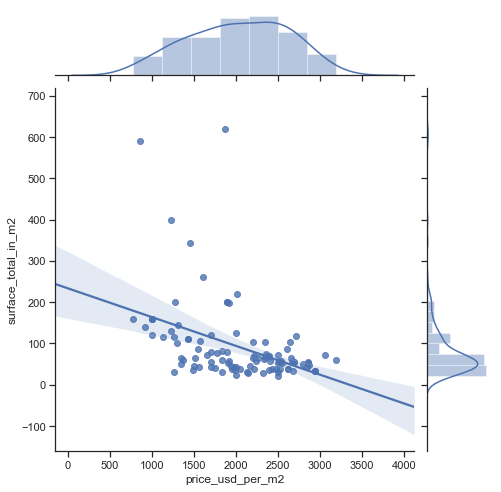

In [119]:
# Planteo un gráfico que se puede hacer para cada barrio mostrando si hay o no relación de escala entre el precio del m2 y la superficie total, a su vez muestra la distribucion de superficie y de precio del m2
# No se como ponerle titulo manana averiguo

sns.set(style="ticks")

g = sns.jointplot('price_usd_per_m2','surface_total_in_m2', data=df[df['place_name']=='Abasto'], kind="reg", color="b", height=7)

In [108]:
aux2 = df[['price_usd_per_m2', 'surface_total_in_m2', 'rooms']]
aux2.head()

,price_usd_per_m2,surface_total_in_m2,rooms
0,1127.272727,55.0,2.0
2,1309.090909,55.0,2.0
4,1828.571429,35.0,2.0
6,1226.415094,106.0,NaN
7,3066.666667,45.0,1.0


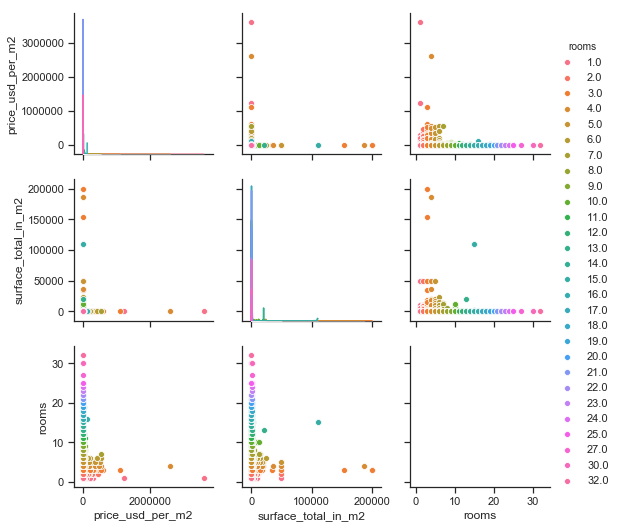

In [109]:
# Los outliers imposibilitan la mayoria de los graficos

sns.set(style="ticks")

sns.pairplot(aux2, hue="rooms")

In [129]:
aux2 = df[df['place_name']=='Abasto'][['price_usd_per_m2', 'surface_total_in_m2', 'rooms']]
aux2.head()


,price_usd_per_m2,surface_total_in_m2,rooms
791,1903.846154,52.0,3.0
5354,1000.000000,160.0,4.0
5356,1000.000000,160.0,4.0
5357,1000.000000,160.0,4.0
5395,1708.860759,79.0,3.0


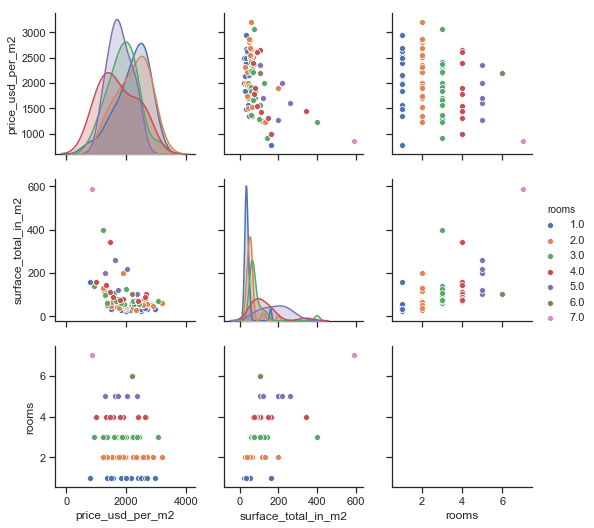

In [130]:
sns.set(style="ticks")

sns.pairplot(aux2, hue='rooms')

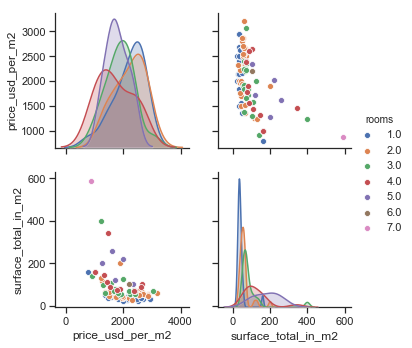

In [131]:
sns.set(style="ticks")

sns.pairplot(aux2, vars=[x for x in aux2.columns if x != 'rooms'], hue='rooms')
